In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit, train_test_split, GridSearchCV
from sklearn.metrics import r2_score, make_scorer, mean_squared_error
import visuals as vs
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [6]:
data = pd.read_csv('C:\\Users\\Facu\\FIA\\datasets\\housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis=1)

print(f'Boston housing dataset has {data.shape[0]} data points with {data.shape[1]} variables each')

Boston housing dataset has 489 data points with 4 variables each


In [9]:
minimum_price = min(prices)
maximum_price = max(prices)
mean_price = np.mean(prices)
median_price = np.median(prices)
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105000.0
Maximum price: $1024800.0
Mean price: $454342.9447852761
Median price $438900.0
Standard deviation of prices: $165171.13154429474


RM: Average number of rooms among homes in the negihborhood.

LSTAT: Is the percentage of homeowners in the neighborhood considered lower class (working porr)

PTRATIO: Is the ratio of students to teachers in primary and secondary schools in the neighborhood.

In [12]:
def performance_metric(y_true, y_predict):
    """Calculates and returns the performance score
    between true and predicted values based on the metric
    chose."""

    score = r2_score(y_true, y_predict)
    return score

# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))


Model has a coefficient of determination, R^2, of 0.923.


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(features, prices, test_size=0.2, random_state=3)

c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not w

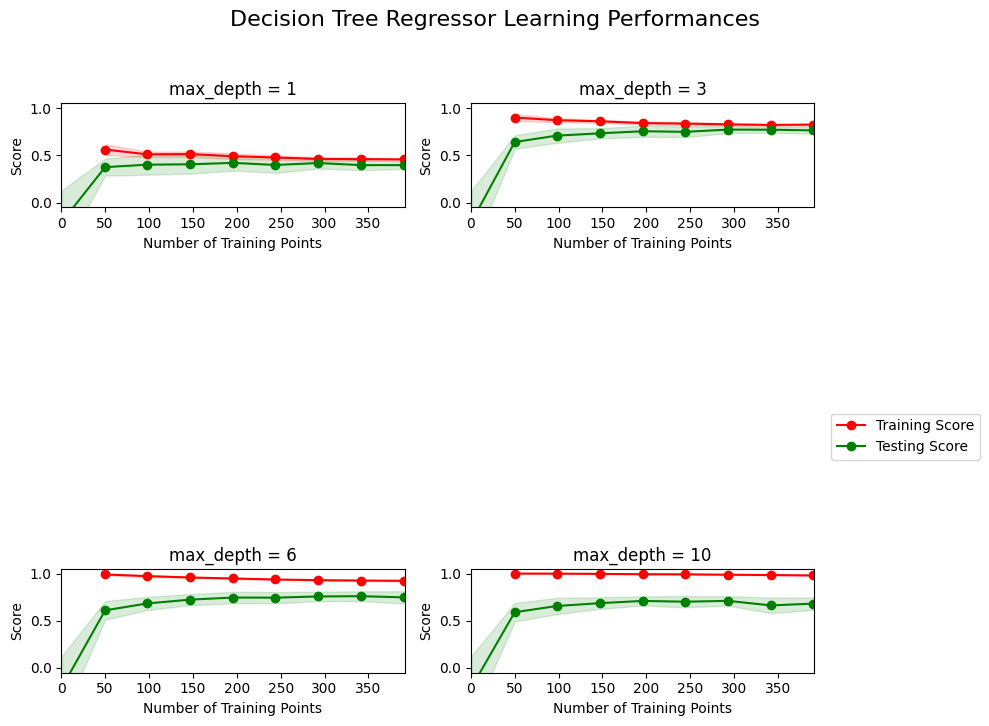

In [16]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

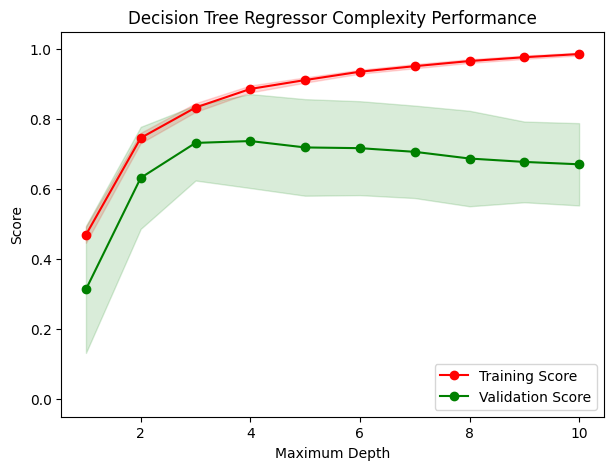

In [17]:

vs.ModelComplexity(X_train, Y_train)

In [25]:
def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': range(1, 11)}

    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search cv object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

reg = fit_model(X_train, Y_train)

print("Parameter 'max_depth' is {} for the optimal model".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model


In [26]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $420,622.22
Predicted selling price for Client 2's home: $235,122.22
Predicted selling price for Client 3's home: $896,280.00


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [27]:
vs.PredictTrials(features, prices, fit_model, client_data)

c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 1: $391,183.33


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 2: $419,700.00


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 3: $415,800.00


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 4: $420,622.22


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 5: $418,377.27


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 6: $411,931.58


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 7: $399,663.16


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 8: $407,232.00


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


Trial 9: $351,577.61
Trial 10: $413,700.00

Range in prices: $69,044.61


c:\Users\Facu\anaconda3\envs\myenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(
